In [29]:
from astropy.io import fits
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
import matplotlib
%matplotlib inline
import datetime as dt
from astropy.stats import LombScargle
from astropy.time import Time

In [19]:
params = {
    'xtick.labelsize':10,
    'ytick.labelsize':10,
    'axes.labelsize':10,
    'legend.fontsize':8,
    'font.family':'Times New Roman',
    'font.weight':'normal',
    'text.usetex':True
}
matplotlib.rcParams.update(params)

width = 3.4
height = width * .8

In [83]:
data_927 = pd.read_excel('../data/0927_measurements.xlsx')

data_1018 = pd.read_excel('../data/1018_measurements.xlsx')

In [102]:
full_data = data_927.append(data_1018, ignore_index=True)
times = Time(full_data['J.D.-2400000'], format='mjd', scale='utc')
full_data['Time Since'] = (times - times[0]).value * 24

# full_data.to_csv('../data/full_data.csv')
t, mags, err = full_data[['Time Since', 'Source_AMag_T1', 'Source_AMag_Err_T1']].values.T

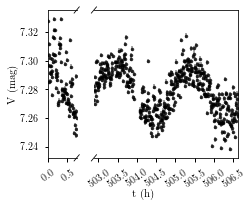

In [126]:
from brokenaxes import brokenaxes

d1_max = max(t[t < 100])
d2_min = min(t[t > 100])

bax = brokenaxes(xlims=((min(t), d1_max),(d2_min, max(t))), wspace=0.2,despine=False)
plt.setp(bax.get_xticklabels(), rotation=35)
bax.errorbar(t, mags, yerr=err, alpha=0.8, fmt='.', c='k', ecolor='gray')
bax.set_xlabel('t (h)')
bax.set_ylabel('V (mag)')

bax.fig.set_size_inches(width, height)
bax.fig.savefig('../docs/project/figs/rawmags.pdf', bbox_inches='tight')

In [120]:
# frequency = np.linspace(1./100, 1./130, 100)
LS = LombScargle(t, mags, dy=err, nterms=1)
frequency, power = LS.autopower()
best_frequency = frequency[np.argmax(power)]
phase = (t * best_frequency) % 2

phase_fit = np.linspace(0, 2)
y_fit = LS.model(phase_fit / best_frequency, best_frequency)

print('Best Frequency: ', best_frequency)
print('Best Period: {} h   {} d'.format(1/best_frequency, 1/best_frequency/24))

Best Frequency:  0.528404324109
Best Period: 1.8924901905121436 h   0.07885375793800599 d


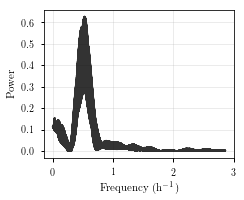

In [123]:
plt.plot(frequency, power, 'k', alpha=.8)
plt.grid(True, alpha=.25)
plt.xlabel(r'Frequency (h^{-1})')
plt.ylabel('Power')
plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/project/figs/power.pdf', bbox_inches='tight')

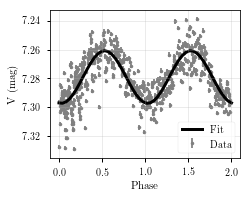

In [125]:
plt.figure()
plt.gca().invert_yaxis()
plt.plot(phase_fit, y_fit, c='k', lw=3, label='Fit', zorder=1)
plt.errorbar(phase, mags, yerr=err, fmt='.', label='Data', c='gray', zorder=0)
plt.grid(True, alpha=.25)
plt.legend()
plt.xlabel('Phase')
plt.ylabel('V (mag)')
plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/project/figs/fit.pdf', bbox_inches='tight')

In [129]:
print('Raw range {} to {} ({} mag)'.format(mags.min(), mags.max(), abs(mags.min() - mags.max())))
print('Fit range {} to {} ({} mag)'.format(y_fit.min(), y_fit.max(), abs(y_fit.min() - y_fit.max())))

Raw range 7.238519 to 7.329167 (0.09064799999999984 mag)
Fit range 7.260779878238971 to 7.297407079213023 (0.03662720097405181 mag)
